### Import CSV to arrays

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('../data/external/exam1_data.csv')

# Convert the columns to NumPy arrays
X = df['x'].to_numpy().reshape(-1, 1)
y = df['y'].to_numpy()

number_of_samples = len(X)

print(f'number_of_samples:{number_of_samples} X.shape:{X.shape} y.shape:{y.shape}')

number_of_samples:300 X.shape:(300, 1) y.shape:(300,)


### Get train dataset (80% of our total dataset)

In [171]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Plot datasets

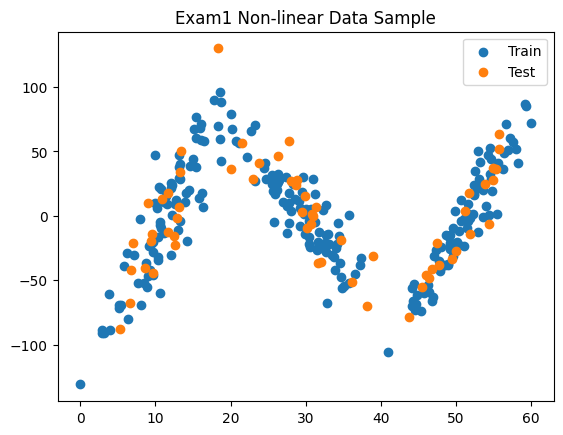

In [172]:
plt.scatter(X_train, y_train, label='Train')
plt.scatter(X_test, y_test, label='Test')
plt.title('Exam1 Non-linear Data Sample')
plt.legend()

### Pre-processing: Use PolynomialFeatures from SKLearn with desired degree (3)

In [173]:
from sklearn.preprocessing import PolynomialFeatures

# Need to convert our X dataset to polynomial

polynomial_degree = 3
polynomial_example = PolynomialFeatures(
    degree=polynomial_degree,
    include_bias=False
)
X_train_polynomial = polynomial_example.fit_transform(X_train)

### Import LinearRegression from SKLearn

In [174]:
from sklearn.linear_model import LinearRegression

model_degree_3 = LinearRegression()
model_degree_3.fit(X_train_polynomial, y_train)
          
print(f'LinearRegression with polynomial pre-processing\nBias: {model_degree_3.intercept_} weight:{model_degree_3.coef_}')

LinearRegression with polynomial pre-processing
Bias: -183.06495597196948 weight:[ 2.75123029e+01 -1.05179542e+00  1.13023391e-02]


### Create [0-60] sample

In [175]:
# Use n samples between 0-60, why not
temp_samples = 200
X_temp = np.linspace(0, 60, temp_samples).reshape(temp_samples, 1)
X_temp_poly = polynomial_example.transform(X_temp)

### Predict with X_temp using trained model_degree_3, plot comparison

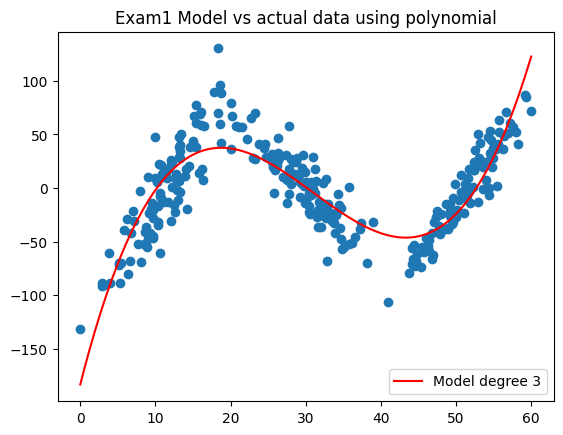

In [176]:
model_temp_prediction = model_degree_3.predict(X_temp_poly)

plt.scatter(X, y)
plt.plot(X_temp, model_temp_prediction, c='r', label='Model degree 3')
plt.title('Exam1 Model vs actual data using polynomial')
plt.legend()

## Get model_degree_3 score

In [177]:
X_test_poly = polynomial_example.transform(X_test)
model_degree_3_score = model_degree_3.score(X_test_poly, y_test)
print(f'score:{model_degree_3_score}')

score:0.6875376077653399


## Compare against degree_5 model

In [178]:
polynomial_example = PolynomialFeatures(
    degree=5,
    include_bias=False
)
X_train_polynomial = polynomial_example.fit_transform(X_train)


model_degree_5 = LinearRegression()
model_degree_5.fit(X_train_polynomial, y_train)
          
print(f'LinearRegression with polynomial pre-processing\nBias: {model_degree_5.intercept_} weight:{model_degree_5.coef_}')

LinearRegression with polynomial pre-processing
Bias: -107.98665876927355 weight:[-1.24167734e+00  2.09382025e+00 -1.24807475e-01  2.50843556e-03
 -1.65084619e-05]


## Plot degree_5 model

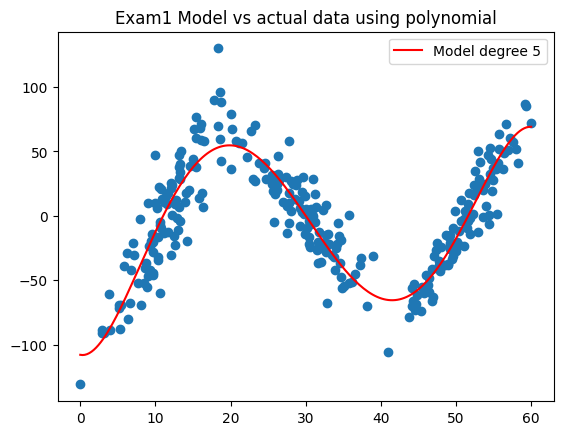

In [181]:
X_temp_poly = polynomial_example.transform(X_temp)
model_temp_prediction = model_degree_5.predict(X_temp_poly)

plt.scatter(X, y)
plt.plot(X_temp, model_temp_prediction, c='r', label='Model degree 5')
plt.title('Exam1 Model vs actual data using polynomial')
plt.legend()

## Get model_degree_5 score

In [182]:
X_test_poly = polynomial_example.transform(X_test)
model_degree_5_score = model_degree_5.score(X_test_poly, y_test)
print(f'score:{model_degree_5_score}')

score:0.755164095938181


## Plot degree_3 vs degree_5 score comparison

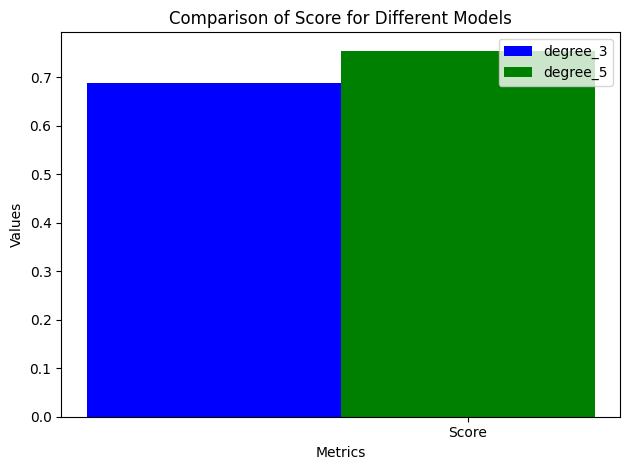

In [189]:
metrics = ['Score']
models = ['degree_3', 'degree_5']
colors = ['b', 'g']

scores = np.array([
    model_degree_3_score,
    model_degree_5_score
])

bar_width = 0.2
index = np.arange(len(metrics))
fig, ax = plt.subplots()

bar_positions = [index + i * bar_width for i in range(len(models))]


for i, model_metrics in enumerate(scores):
    ax.bar(bar_positions[i], model_metrics, bar_width, color=colors[i], label=models[i])

ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of Score for Different Models')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(metrics)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()